In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,MaxPooling2D,Conv2D,MaxPool2D,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler,MinMaxScaler

In [ ]:
(X_train,y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


In [ ]:
classes_name = ["Airplane", "AutoMobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]

In [ ]:
def img_show(X, y, index = None):

    plt.figure(figsize = (15,6))
    plt.imshow(X[index])
    plt.title(classes_name[y[index][0]],fontsize = 15)
    plt.axis("off")
    plt.show()

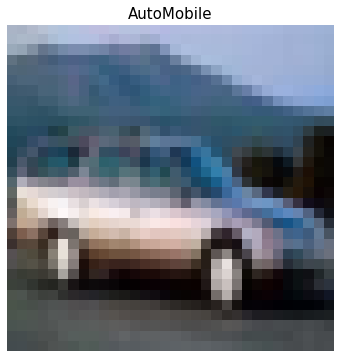

In [ ]:
img_show(X_train, y_train, index = 4)

In [ ]:
print("X Train Max : {}".format(X_train.max()))
print("X Train Min : {}".format(X_train.min()))
print()
print("X Test Max : {}".format(X_test.max()))
print("X Test Min : {}".format(X_test.min()))

X Train Max : 255
X Train Min : 0

X Test Max : 255
X Test Min : 0


In [ ]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [ ]:
print("X Train Max : {}".format(X_train_scaled.max()))
print("X Train Min : {}".format(X_train_scaled.min()))
print()
print("X Test Max : {}".format(X_test_scaled.max()))
print("X Test Min : {}".format(X_test_scaled.min()))

X Train Max : 1.0
X Train Min : 0.0

X Test Max : 1.0
X Test Min : 0.0


In [ ]:
print("X Train Shape : {}".format(X_train.shape))
print("Y Train Shape : {}".format(y_train.shape))
print()
print("X Test Shape : {}".format(X_test.shape))
print("Y Test Shape : {}".format(y_test.shape))

X Train Shape : (50000, 32, 32, 3)
Y Train Shape : (50000, 1)

X Test Shape : (10000, 32, 32, 3)
Y Test Shape : (10000, 1)


In [ ]:
# Build CNN Model

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), strides = (1,1), padding = "same", activation = "relu", input_shape = [32,32,3]))

model.add(Conv2D(filters = 32, kernel_size = (3,3), strides = (1,1), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2), strides = 2, padding = "valid"))
model.add(Dropout(rate = 0.5))

model.add(Flatten())
model.add(Dense(units = 128 , activation = "relu"))
model.add(Dense(units = 10, activation = "softmax"))

model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1048704   
_________________________________________________________________
dense_1 (Dense)              (None, 10)               

In [ ]:
history = model.fit(X_train_scaled, y_train , epochs = 3, batch_size = 10, validation_data = (X_test_scaled, y_test))

Epoch 1/3
5000/5000 [==============================] - 209s 42ms/step - loss: 0.9648 - accuracy: 0.6610 - val_loss: 0.9701 - val_accuracy: 0.6586
Epoch 2/3
5000/5000 [==============================] - 210s 42ms/step - loss: 0.8826 - accuracy: 0.6899 - val_loss: 0.9298 - val_accuracy: 0.6760
Epoch 3/3
5000/5000 [==============================] - 210s 42ms/step - loss: 0.8177 - accuracy: 0.7113 - val_loss: 0.9216 - val_accuracy: 0.6829


In [ ]:
def history_graph(history):

    plt.figure(figsize = (15,6))
    size = 15
    plt.subplot(1,2,1)
    plt.plot(history.history["accuracy"], label = "Train")
    plt.plot(history.history["val_accuracy"], label = "Test")
    plt.legend(loc = "best")
    plt.title("Accuracy Graph", fontsize = size)
    plt.xlabel("Epochs", fontsize = size)
    plt.ylabel("Accuracy Score", fontsize = size)

    plt.subplot(1,2,2)
    plt.plot(history.history["loss"],label = "Train")
    plt.plot(history.history["val_loss"], label = "Test")
    plt.legend(loc = "best")
    plt.title("Loss Graph", fontsize = size)
    plt.xlabel("Epochs", fontsize = size)
    plt.ylabel("Loss Score", fontsize = size)

    plt.tight_layout()
    plt.show()

In [ ]:
def confusion_graph(y_true, y_pred, classes = "auto"):

    from sklearn.metrics import confusion_matrix
    import seaborn as sns

    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize = (15,6))
    sns.heatmap(cm, annot = True, cbar = False, cmap = "viridis", annot_kws= {"size" : 15}, fmt = "d", xticklabels=classes , yticklabels = classes )
    
    size = 15
    plt.xlabel("Predicted",fontsize = size)
    plt.ylabel("Actual", fontsize = size)
    plt.title("Confusion Matrix" , fontsize = size)

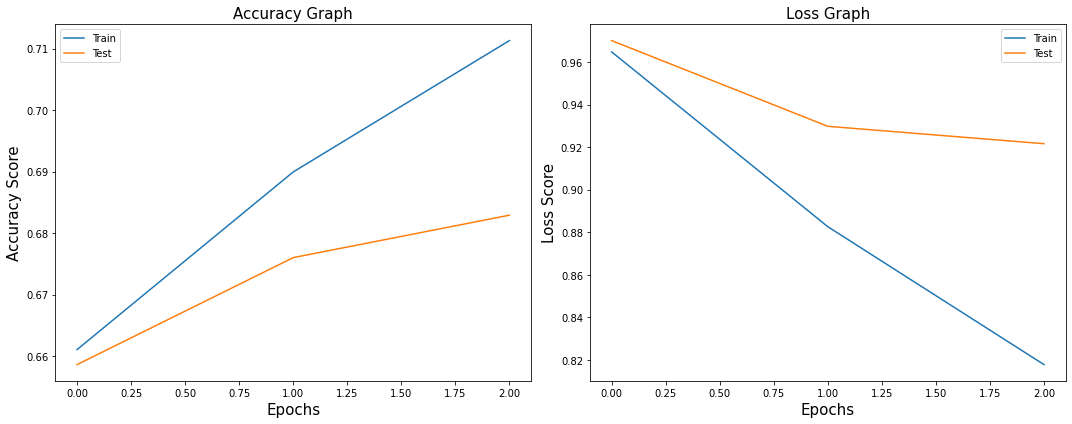

In [ ]:
history_graph(history)

In [ ]:
y_pred = model.predict(X_test_scaled)

y_pred_max = [np.argmax(i) for i in y_pred]

y_pred_max[:5]

[3, 8, 8, 0, 6]

In [ ]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

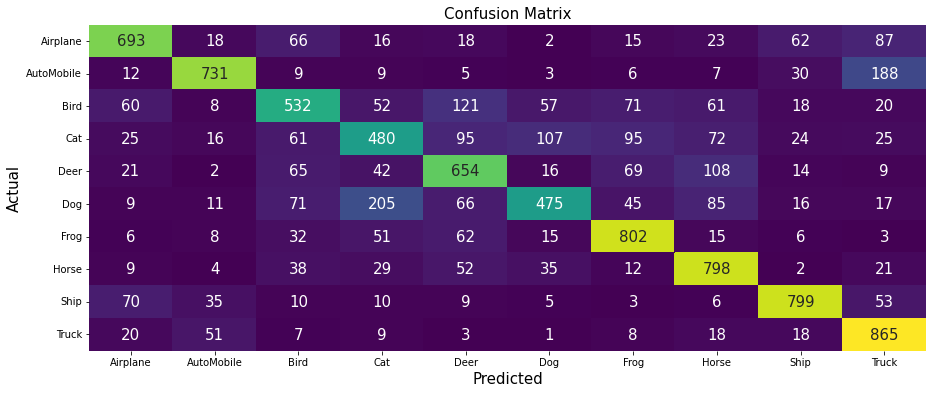

In [ ]:
confusion_graph(y_test, y_pred_max , classes_name)